In [20]:
import sympy as sp
from sympy.solvers import solve
T_avg = sp.Symbol('T_avg')
c1 = sp.Symbol('c1')
c2 = sp.Symbol('c2')
T_l = sp.Symbol('T_l')
T_c = sp.Symbol('T_c')
T_s = sp.Symbol('T_s')
a0 = sp.Symbol('a0')
k_m = sp.Symbol('k_m')
R_p = sp.Symbol('R_p')
R_l = sp.Symbol('R_l')
R_c = sp.Symbol('R_c')
V = sp.Symbol('V')
T_m = sp.Symbol('T_m')
a_rh = sp.Symbol('a_rh')
R_b = sp.Symbol('R_b')
Ea = sp.Symbol('Ea')
q_bl = sp.Symbol('q_bl')
rho_m = sp.Symbol('rho_m')
kappa_m = sp.Symbol('kappa_m')
alpha_m = sp.Symbol('alpha_m')
g_sfc = sp.Symbol('g_sfc')
eta_0 = sp.Symbol('eta_0')
T_0 = sp.Symbol('T_0')
eta_m = sp.Symbol('eta_m')
TBL_u = sp.Symbol('TBL_u')
T_m = sp.Symbol('T_m')
q_bl = sp.Symbol('q_bl')
mu = sp.Symbol('mu')
A_rh = sp.Symbol('A_rh')
h_rh = sp.Symbol('h_rh')
B_rh = sp.Symbol('B_rh')
m_rh = sp.Symbol('m_rh')
R_l = sp.Symbol('R_l')
R_c = sp.Symbol('R_c')
Ra_crit = sp.Symbol('Ra_crit')
H_0 = sp.Symbol('H_0')
D_l = sp.Symbol('D_l')


0.0177559904379085
kappa_m 1.00075056292219e-6
eta_M 1.44502286065192e+20
kappa_m*eta_m 144610744123285.
(alpha_m*rho_m*g_sfc*(T_c-T_m) / (kappa_m*eta_m)) 1.02340746422655e-12
(alpha_m*rho_m*g_sfc*(T_c-T_m)) 147.995714943126
3.38275919870002
T_l 1542.91211666667
dT,  207.087883333333
delta_bl,  76042.1950014648
0.0108933143410363
D_l 3400000.0 - 23625974.2210911*(-0.5 + 0.866025403784439*I)*(-0.000934181156363873 + 0.000315863030017084*I)**(1/3) - 4.70292188044128e-9*(-0.5 - 0.866025403784439*I)*(-7.5257907704472e-12*210**(1/3)*(4.20728596413923e+21*210**(2/3) + 1.06453068423055e+24) + 104040000000000.0)/(-0.000934181156363873 + 0.000315863030017084*I)**(1/3)


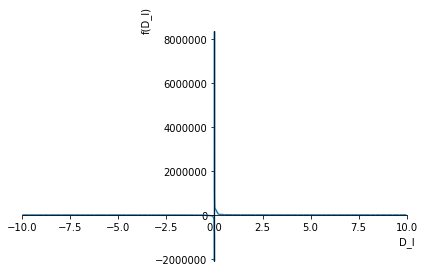

In [58]:
# expression for D_l if the lid changes instantly - solve continuity of flux - as a function of T_m, T_c
# q_cond = q_bl


dict_eval = dict(T_m=1750, T_c=2250, D_l=300e3, 
    g_sfc=3.382759198700019,H_0=4e-12, # final radiogenic heating in W/kg
                             X_K=305, # initial abundance of K in wt ppm
                             X_U=16e-3, # initial abundane of U in wt ppm 
                             X_Th=56e-3, # initial abundance of Th in wt ppm 
                             Ra_crit_u=450, 
                             R_p=3400e3, 
                             R_c=1700e3,
                             alpha_m=2.5e-5, # thermal expansivity
                             k_m=4, # silicate thermal conductivity
                             CMF=0.24, # not used
                             rho_c=7200, # core density
                             rho_m=3500, # mantle density 
                             c_m=1142, #<----??? TODO: check if you need constant volume c_p
                             c_c=840, # specific heat for core in J/K/kg
                             k_lm=4, # thermal conduvtivity lower mantle
                             a_rh=2.44, # for beta=1/3 
                             Ea=300e3, # activation energy in J for viscosity law
                             eta_0=1e21, # reference dynamic viscosity in Pa s
                             T_ref=1600, # viscosity law reference temperature in K
                             T_s=250, # fixed surface temp in K
                             M_p=6.39e23, # only used for gravity in this case
                              mu=80e9, A_rh=8.7e15, R_b = 8.314, Ra_crit = 450, kappa_m =1.0007505629221917e-06,
                     h_rh=2.07e-3, B_rh=0.5e-9, m_rh=2.5)

# q_cond?
T_l_exp = sp.Symbol('T_l')
T_l_exp = T_m - a_rh*(R_b*T_m**2/Ea)
a0 = H_0*rho_m
R_l = R_p - D_l
c1 = k_m*(T_l - T_s - a0/(6*k_m)*(R_p**2 - R_l**2))/(R_l**-1 - R_p**-1)
dTdr = -a0/(3*k_m)*R_p - c1/(k_m*R_p**2)
q_cond = -k_m*dTdr 
print(q_cond.subs(T_l, T_l_exp).subs(dict_eval))

# q_bl?
eta_m = mu/(2*A_rh) * (h_rh/B_rh)**m_rh*sp.exp(Ea/(R_b*T_m))
delta_bl = (Ra_crit/(alpha_m*rho_m*g_sfc*(T_c-T_m) / (kappa_m*eta_m)))**(1/3)
dT = T_m - T_l
q_bl = k_m*dT/delta_bl
print('kappa_m', (kappa_m).subs(dict_eval))
print('eta_M', (eta_m).subs(dict_eval))
print('kappa_m*eta_m', (kappa_m*eta_m).subs(dict_eval))
print('(alpha_m*rho_m*g_sfc*(T_c-T_m) / (kappa_m*eta_m))', (alpha_m*rho_m*g_sfc*(T_c-T_m) / (kappa_m*eta_m)).subs(T_l, T_l_exp).subs(dict_eval))
print('(alpha_m*rho_m*g_sfc*(T_c-T_m))', (alpha_m*rho_m*g_sfc*(T_c-T_m)).subs(T_l, T_l_exp).subs(dict_eval))
print((g_sfc).subs(dict_eval))
print('T_l', T_l_exp.subs(dict_eval))
print('dT, ', dT.subs(T_l, T_l_exp).subs(dict_eval))
print('delta_bl, ', delta_bl.subs(T_l, T_l_exp).subs(dict_eval))
print(q_bl.subs(T_l, T_l_exp).subs(dict_eval))

# plug in values to make sure this is correct
# check if this q_bl is actually right
# then solve for D_l

# expr = sp.solve(q_cond - q_bl, D_l) # no solution?

print('D_l', expr[1].subs(T_l, T_l_exp).subs(dict(T_m=1750, T_c=2250, 
    g_sfc=3.382759198700019,H_0=4e-12, # final radiogenic heating in W/kg
                             X_K=305, # initial abundance of K in wt ppm
                             X_U=16e-3, # initial abundane of U in wt ppm 
                             X_Th=56e-3, # initial abundance of Th in wt ppm 
                             Ra_crit_u=450, 
                             R_p=3400e3, 
                             R_c=1700e3,
                             alpha_m=2.5e-5, # thermal expansivity
                             k_m=4, # silicate thermal conductivity
                             CMF=0.24, # not used
                             rho_c=7200, # core density
                             rho_m=3500, # mantle density 
                             c_m=1142, #<----??? TODO: check if you need constant volume c_p
                             c_c=840, # specific heat for core in J/K/kg
                             k_lm=4, # thermal conduvtivity lower mantle
                             a_rh=2.44, # for beta=1/3 
                             Ea=300e3, # activation energy in J for viscosity law
                             eta_0=1e21, # reference dynamic viscosity in Pa s
                             T_ref=1600, # viscosity law reference temperature in K
                             T_s=250, # fixed surface temp in K
                             M_p=6.39e23, # only used for gravity in this case
                              mu=80e9, A_rh=8.7e15, R_b = 8.314, Ra_crit = 450, kappa_m =1.0007505629221917e-06,
                     h_rh=2.07e-3, B_rh=0.5e-9, m_rh=2.5)))

sp.plot((q_cond - q_bl).subs(T_l, T_l_exp).subs(dict(T_m=1750, T_c=2250, 
    g_sfc=3.382759198700019,H_0=4e-12, # final radiogenic heating in W/kg
                             X_K=305, # initial abundance of K in wt ppm
                             X_U=16e-3, # initial abundane of U in wt ppm 
                             X_Th=56e-3, # initial abundance of Th in wt ppm 
                             Ra_crit_u=450, 
                             R_p=3400e3, 
                             R_c=1700e3,
                             alpha_m=2.5e-5, # thermal expansivity
                             k_m=4, # silicate thermal conductivity
                             CMF=0.24, # not used
                             rho_c=7200, # core density
                             rho_m=3500, # mantle density 
                             c_m=1142, #<----??? TODO: check if you need constant volume c_p
                             c_c=840, # specific heat for core in J/K/kg
                             k_lm=4, # thermal conduvtivity lower mantle
                             a_rh=2.44, # for beta=1/3 
                             Ea=300e3, # activation energy in J for viscosity law
                             eta_0=1e21, # reference dynamic viscosity in Pa s
                             T_ref=1600, # viscosity law reference temperature in K
                             T_s=250, # fixed surface temp in K
                             M_p=6.39e23, # only used for gravity in this case
                              mu=80e9, A_rh=8.7e15, R_b = 8.314, Ra_crit = 450, kappa_m =1.0007505629221917e-06,
                     h_rh=2.07e-3, B_rh=0.5e-9, m_rh=2.5)))

In [37]:
print('expr', expr)

expr [R_p - 0.111111111111111*(9.0*R_p**2 - 6.0e-14*(-377976314968461.0*R_p*T_l*k_m + 377976314968461.0*R_p*T_m*k_m + 300000000000000.0*T_l*k_m*(Ra_crit*kappa_m*mu*(h_rh/B_rh)**m_rh*exp(Ea/(R_b*T_m))/(A_rh*T_c*alpha_m*g_sfc*rho_m - A_rh*T_m*alpha_m*g_sfc*rho_m))**(1/3) - 300000000000000.0*T_s*k_m*(Ra_crit*kappa_m*mu*(h_rh/B_rh)**m_rh*exp(Ea/(R_b*T_m))/(A_rh*T_c*alpha_m*g_sfc*rho_m - A_rh*T_m*alpha_m*g_sfc*rho_m))**(1/3))/(H_0*rho_m*(Ra_crit*kappa_m*mu*(h_rh/B_rh)**m_rh*exp(Ea/(R_b*T_m))/(A_rh*T_c*alpha_m*g_sfc*rho_m - A_rh*T_m*alpha_m*g_sfc*rho_m))**(1/3)))/(-R_p**3 + (-(R_p**2 - 6.66666666666667e-15*(Ra_crit*kappa_m*mu*(h_rh/B_rh)**m_rh*exp(Ea/(R_b*T_m))/(A_rh*T_c*alpha_m*g_sfc*rho_m - A_rh*T_m*alpha_m*g_sfc*rho_m))**(-0.333333333333333)*(-377976314968461.0*R_p*T_l*k_m + 377976314968461.0*R_p*T_m*k_m + 300000000000000.0*T_l*k_m*(Ra_crit*kappa_m*mu*(h_rh/B_rh)**m_rh*exp(Ea/(R_b*T_m))/(A_rh*T_c*alpha_m*g_sfc*rho_m - A_rh*T_m*alpha_m*g_sfc*rho_m))**0.333333333333333 - 300000000000000.0*T

In [2]:
# expression for T_m

T_l = T_m - a_rh*(R_b*T_m**2/Ea)
T_m = sp.solve(T_m - a_rh*(R_b*T_m**2/Ea) - T_l, T_m)[0]
print('T_m = ', T_m)
c1 = k_m*(T_l - T_s - a0/(6*k_m)*(R_p**2 - R_l**2))/(R_l**-1 - R_p**-1)
c2 = T_s + a0/(6*k_m)*R_p**2 - c1/(k_m*R_p)


T_m =  (Ea - sqrt(Ea*(Ea - 4*R_b*T_l*a_rh)))/(2*R_b*a_rh)


In [ ]:
# expression for qsfc - not going to be a self-consistent solution because D_l depends on T_m as an ODE
T_l_exp = T_m - a_rh*(R_b*T_m**2/Ea)
c1 = k_m*(T_l - T_s - a0/(6*k_m)*(R_p**2 - R_l**2))/(R_l**-1 - R_p**-1)
dTdr = -a0/(3*k_m)*r - c1/(k_m*r**2)
q_sfc_exp = -k_m*dTdr
q_sfc_exp.subs(r, R_p).subs(T_l, T_l_exp).subs(R_l, R_l_exp)

q_sfc = sp.Symbol('q_sfc')


In [4]:
# expression for q_bl = f(T_m, eta_0, Ea...)
sp.init_printing()


T_l_exp = T_m - a_rh*(R_b*T_m**2/Ea)
dT = T_m - T_l_exp
Ra_rh = alpha_m*rho_m*g_sfc*dT*(R_l - R_c)**3 / (kappa_m*eta_m)

TBL_u_exp = (R_l - R_c) * (Ra_crit/Ra_rh)**(1/3)
q_bl_exp = k_m*dT/TBL_u_exp

# q_bl_exp = q_bl_exp.subs(TBL_u, TBL_u_exp)
# q_bl_exp = q_bl_exp.subs(T_l, T_l_exp)
eta_m_exp = mu/(2*A_rh) * (h_rh/B_rh)**m_rh * sp.exp(Ea/(R_b*T_m))
q_bl_exp = q_bl_exp.subs(eta_m, eta_m_exp)


print('\n q_bl = ', q_bl_exp)

# differentiate

dqdT = sp.diff(q_bl_exp, T_m)
dqdeta0 = sp.diff(q_bl_exp, eta_0)
dqdEa = sp.diff(q_bl_exp, Ea)

print('\n dq_bl/dT_m =', dqdT)
print('\n dq_bl/deta_0 =', dqdeta0)
print('\n dq_bl/dEa =', dqdEa)

C = sp.Symbol('C')
RMS_exp = C*((alpha_m*q_bl*eta_m*kappa_m)/(rho_m*g_sfc*k_m))**(1/2)
RMS_exp = RMS_exp.subs(eta_m, eta_m_exp)
print('\n dyn_top_rms =', RMS_exp)




# eta_m_solve = solve(q_bl_exp - q_bl, eta_m)
# print('eta_m =', eta_m_solve)

# T_m_solve = solve(q_bl_exp - q_bl, T_m) # no solution for T_m
# print('T_m =', T_m_solve)


 q_bl =  1.25992104989487*R_b*T_m**2*a_rh*k_m*(Ea*Ra_crit*kappa_m*mu*(h_rh/B_rh)**m_rh*exp(Ea/(R_b*T_m))/(A_rh*R_b*T_m**2*a_rh*alpha_m*g_sfc*rho_m*(-R_c + R_l)**3))**(-0.333333333333333)/(Ea*(-R_c + R_l))

 dq_bl/dT_m = 1.25992104989487*A_rh*R_b**2*T_m**4*a_rh**2*alpha_m*g_sfc*k_m*rho_m*(h_rh/B_rh)**(-m_rh)*(Ea*Ra_crit*kappa_m*mu*(h_rh/B_rh)**m_rh*exp(Ea/(R_b*T_m))/(A_rh*R_b*T_m**2*a_rh*alpha_m*g_sfc*rho_m*(-R_c + R_l)**3))**(-0.333333333333333)*(-R_c + R_l)**2*(0.333333333333333*Ea**2*Ra_crit*kappa_m*mu*(h_rh/B_rh)**m_rh*exp(Ea/(R_b*T_m))/(A_rh*R_b**2*T_m**4*a_rh*alpha_m*g_sfc*rho_m*(-R_c + R_l)**3) + 0.666666666666667*Ea*Ra_crit*kappa_m*mu*(h_rh/B_rh)**m_rh*exp(Ea/(R_b*T_m))/(A_rh*R_b*T_m**3*a_rh*alpha_m*g_sfc*rho_m*(-R_c + R_l)**3))*exp(-Ea/(R_b*T_m))/(Ea**2*Ra_crit*kappa_m*mu) + 2.51984209978975*R_b*T_m*a_rh*k_m*(Ea*Ra_crit*kappa_m*mu*(h_rh/B_rh)**m_rh*exp(Ea/(R_b*T_m))/(A_rh*R_b*T_m**2*a_rh*alpha_m*g_sfc*rho_m*(-R_c + R_l)**3))**(-0.333333333333333)/(Ea*(-R_c + R_l))

 dq_bl/deta

In [ ]:
from sympy.plotting import plot

plot(T_m, q_bl_exp)

In [15]:
# # hold q_bl constant

# assume q_sfc = q_bl for simplicity

# solve both rheology eqns for q and plot seperately with same constant q

print('eta_0(q_bl) = ',sp.solve(q_bl_exp - q_bl, eta_0))
print('\n Ea(q_bl) = ',sp.solve(q_bl_exp - q_bl, Ea))
print('\n T_m(q_bl) = ',sp.solve(q_bl_exp - q_bl, T_m))


T_m = sp.Symbol('T_m')
q_bl = sp.Symbol('q_bl')
T_l_exp = T_m - a_rh*(R_b*T_m**2/Ea)
TBL_u_exp = (rho_m*g_sfc*alpha_m*(T_m - T_l)/(eta_m*kappa_m))**(-1/3)
eta_m_exp = eta_0*sp.exp(Ea/R_b * (T_m**-1 - T_0**-1))
q_bl_exp = k_m*(T_m - T_l)/TBL_u
q_bl_exp = q_bl_exp.subs(TBL_u, TBL_u_exp)
q_bl_exp = q_bl_exp.subs(T_l, T_l_exp)
print('\n\neta_0(eta) = ',sp.solve(q_bl_exp - q_bl, eta_m))
print('\n Ea(eta) = ',sp.solve(q_bl_exp - q_bl, eta_m))

eta_0(q_bl) =  [R_b**4*T_m**8*a_rh**4*alpha_m*g_sfc*k_m**3*rho_m*exp(-Ea*(T_0 - T_m)/(R_b*T_0*T_m))/(Ea**4*kappa_m*q_bl**3)]

 Ea(q_bl) =  [4.0*R_b*T_0*T_m*LambertW(0.25*T_m*a_rh*(alpha_m*g_sfc*k_m**3*rho_m/(eta_0*kappa_m*q_bl**3))**(1/4)*(-T_0 + T_m)/T_0)/(T_0 - T_m), 4.0*R_b*T_0*T_m*LambertW(0.25*T_m*a_rh*(alpha_m*g_sfc*k_m**3*rho_m/(eta_0*kappa_m*q_bl**3))**(1/4)*(T_0 - T_m)/T_0)/(T_0 - T_m), 4.0*R_b*T_0*T_m*LambertW(0.25*I*T_m*a_rh*(alpha_m*g_sfc*k_m**3*rho_m/(eta_0*kappa_m*q_bl**3))**(1/4)*(-T_0 + T_m)/T_0)/(T_0 - T_m), 4.0*R_b*T_0*T_m*LambertW(0.25*I*T_m*a_rh*(alpha_m*g_sfc*k_m**3*rho_m/(eta_0*kappa_m*q_bl**3))**(1/4)*(T_0 - T_m)/T_0)/(T_0 - T_m)]


NotImplementedError: multiple generators [(R_b*T_m**2*a_rh*alpha_m*g_sfc*rho_m*exp(Ea/(R_b*T_0))*exp(-Ea/(R_b*T_m))/(Ea*eta_0*kappa_m))**(1/3), T_m]
No algorithms are implemented to solve equation -q_bl + R_b*T_m**2*a_rh*k_m*(R_b*T_m**2*a_rh*alpha_m*g_sfc*rho_m*exp(-Ea*(1/T_m - 1/T_0)/R_b)/(Ea*eta_0*kappa_m))**(1/3)/Ea

In [6]:
# when q_ubl = q_cond_lid
q_bl_exp = k_m*alpha_m**(1/3)*rho_m**(1/3)*g_sfc**(1/3)*(2*A_rh)**(1/3)*a_rh**(4/3)*R_b**(4/3)*T_m**(8/3) / (Ra_crit**(1/3)*kappa_m**(1/3)*mu**(1/3)*(h_rh/B_rh)**(m_rh/3)*Ea**(4/3)*exp(Ea/(3*p.R_b*T_m)))


NameError: name 'exp' is not defined

In [3]:
# when T_lid(z=R_l) = T_l

exp = 3/(R_p**3 - R_c**3)*((T_m/3)*(R_l**3 - R_c**3) - a0/(30*k_m)*(R_p**5 - R_l**5) + c1/(2*k_m)*(R_p**2 - R_l**2)  + c2/3*(R_p**3 - R_l**3))
root = sp.solve(exp - T_avg, T_l) #T_avg = (4*sp.pi/V) * I
ans = root[0]
# root = sp.solve(ans - T_l, T_m)
print(root[0])

(k_m*(4*R_l**4 - 4*R_l**3*R_p - 3*R_l**2*R_p**2 + 2*R_l*R_p**3 + R_p**4)*(-60*Ea*R_c**6*k_m + 60*Ea*R_c**3*R_l**3*k_m + 30*Ea*R_c**3*R_l**2*R_p*k_m + 30*Ea*R_c**3*R_l*R_p**2*k_m - 30*Ea*R_l**5*R_p*k_m - 30*Ea*R_l**4*R_p**2*k_m + 120*R_b*R_c**3*R_l**3*T_avg*a_rh*k_m - 60*R_b*R_c**3*R_l**2*R_p*T_avg*a_rh*k_m - 60*R_b*R_c**3*R_l*R_p**2*T_avg*a_rh*k_m - 8*R_b*R_l**8*a0*a_rh + 14*R_b*R_l**7*R_p*a0*a_rh + 9*R_b*R_l**6*R_p**2*a0*a_rh - 20*R_b*R_l**5*R_p**3*a0*a_rh - 60*R_b*R_l**5*R_p*T_s*a_rh*k_m - 10*R_b*R_l**4*R_p**4*a0*a_rh - 30*R_b*R_l**4*R_p**2*T_s*a_rh*k_m + 18*R_b*R_l**3*R_p**5*a0*a_rh - 120*R_b*R_l**3*R_p**3*T_avg*a_rh*k_m + 180*R_b*R_l**3*R_p**3*T_s*a_rh*k_m + R_b*R_l**2*R_p**6*a0*a_rh + 60*R_b*R_l**2*R_p**4*T_avg*a_rh*k_m - 30*R_b*R_l**2*R_p**4*T_s*a_rh*k_m - 4*R_b*R_l*R_p**7*a0*a_rh + 60*R_b*R_l*R_p**5*T_avg*a_rh*k_m - 60*R_b*R_l*R_p**5*T_s*a_rh*k_m) - 2*sqrt(15)*sqrt(Ea*k_m**3*(60*Ea*R_c**6*k_m - 60*Ea*R_c**3*R_l**2*R_p*k_m - 60*Ea*R_c**3*R_l*R_p**2*k_m + 15*Ea*R_l**4*R_p**2*k_m +